# Example 2

This is taken from https://github.com/svenreiche/Genesis-1.3-Version4/

In [1]:
from genesis.version4 import Genesis4
%config InlineBackend.figure_format = 'retina' # Nicer plots

In [2]:
G = Genesis4('data/example2-dumps/Example2.in')

In [3]:
G.run()

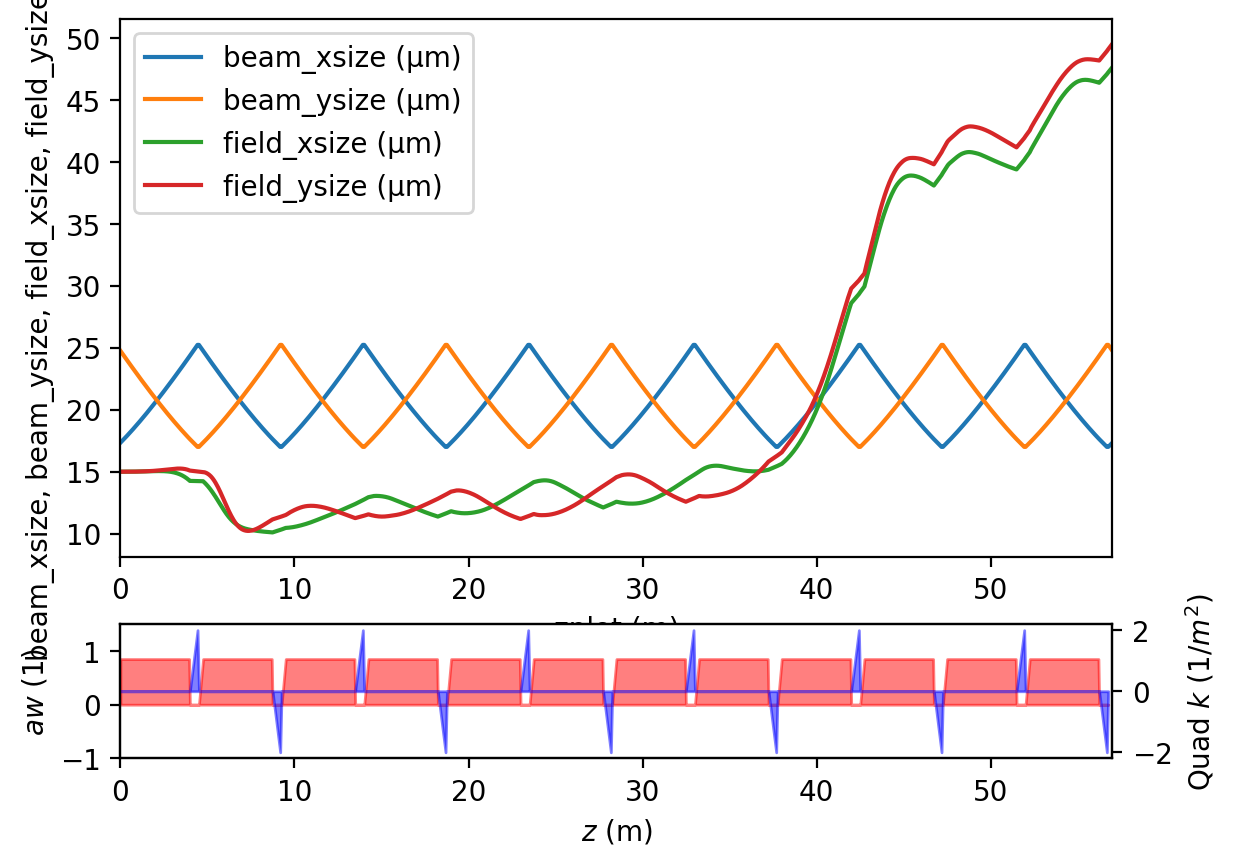

In [4]:
G.plot(['beam_xsize', 'beam_ysize', 'field_xsize', 'field_ysize'])

# Replicate plots from the official docs

In [5]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os

In [6]:
fld_file_pattern = os.path.join(G.path, 'Example2.%d.fld.h5')
par_file_pattern = os.path.join(G.path, 'Example2.%d.par.h5')
outfile = os.path.join(G.path, 'Example2.out.h5')

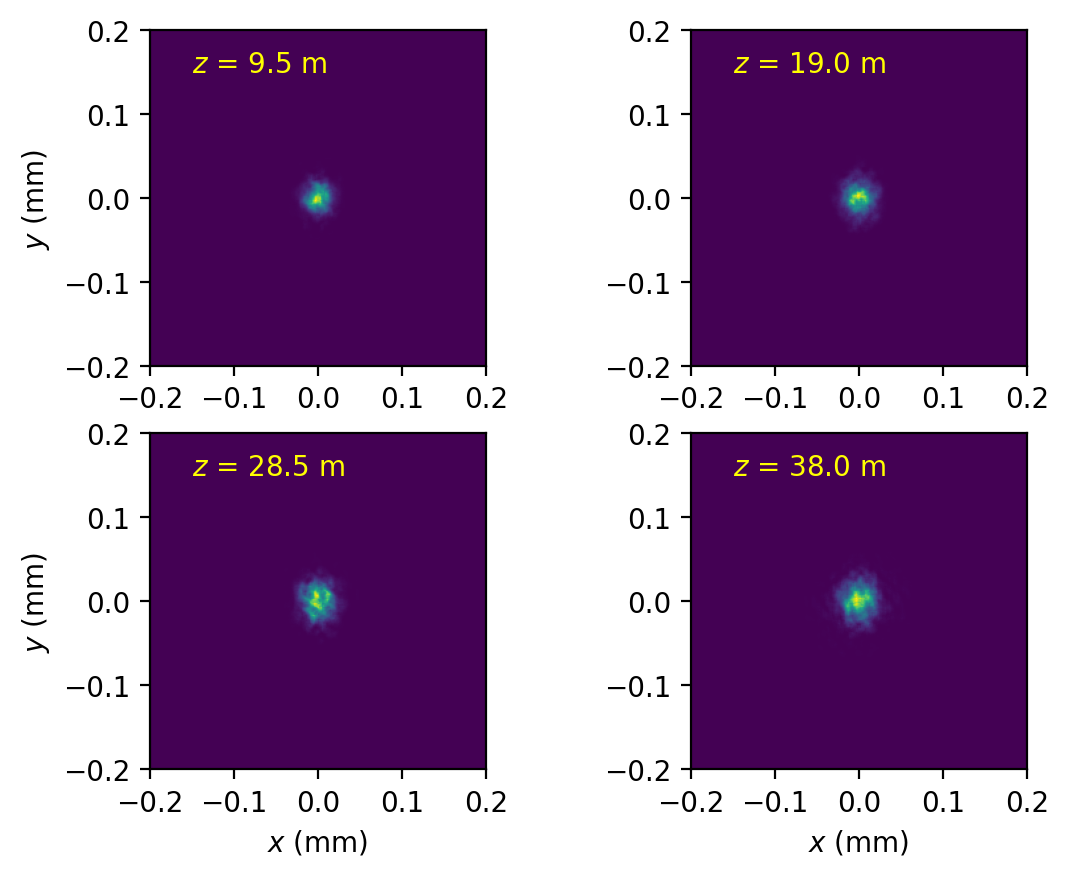

In [7]:
def getWF(filename,slice=1):
    hfl = h5py.File(filename,'r')
    slc = 'slice%6.6d' % slice
    ng = hfl['gridpoints'][()][0]
    dg = hfl['gridsize'][()][0]
    fre = hfl[slc]['field-real'][()]
    fim = hfl[slc]['field-imag'][()]
    inten = np.reshape(fre*fre+fim*fim, (ng,ng))
    return inten,dg*(ng-1)*0.5*1e3


def getPS(filename,slice=1):
    hfl = h5py.File(filename,'r')
    slc = 'slice%6.6d' % slice
    gamma = hfl[slc]['gamma'][()]*0.511e-3
    theta = np.mod(hfl[slc]['theta'][()]-np.pi*0.5,2*np.pi)
    return theta, gamma

def getTS(filename,slice=1):
    hfl = h5py.File(filename,'r')
    slc = 'slice%6.6d' % slice
    x = hfl[slc]['x'][()]*1e6
    theta = np.mod(hfl[slc]['theta'][()]-np.pi*0.5,2*np.pi)
    return theta, x

# plot wavefront
istep = 184
figs, axs = plt.subplots(2, 2)
color = 'yellow'
for i1 in range(2):
    for i2 in range(2):
        i = (i2*2+i1 +1)*istep
        inten, dg = getWF(fld_file_pattern % i, 1)
        axs[i2, i1].imshow(inten,extent=(-dg,dg,-dg,dg))
        txt = r'$z$ = %3.1f m' % (9.5*(i2*2+i1+1))
        axs[i2, i1].text(-0.15, 0.15, txt ,color = color)

axs[1,0].set_xlabel(r'$x$ (mm)')
axs[1,1].set_xlabel(r'$x$ (mm)')
axs[0,0].set_ylabel(r'$y$ (mm)')
axs[1,0].set_ylabel(r'$y$ (mm)')
plt.show()

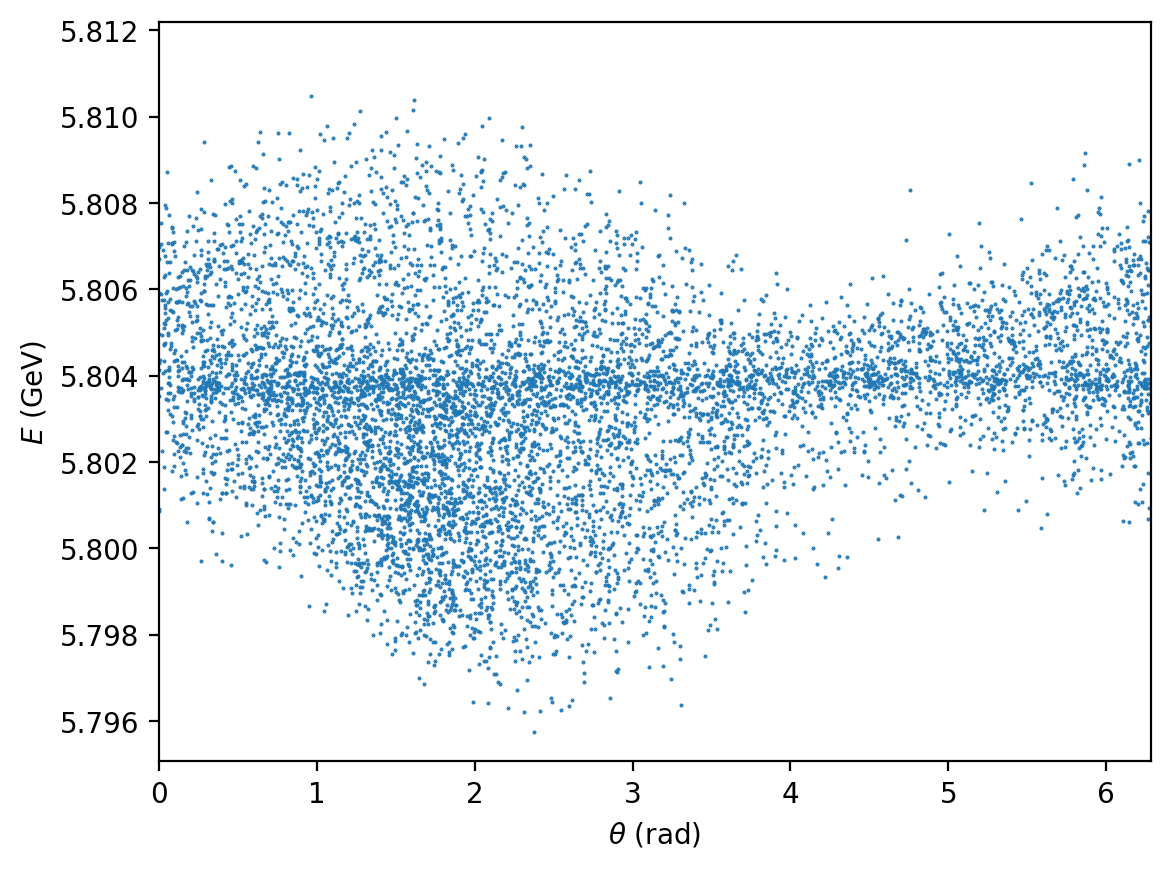

In [8]:
# get range for phase space plots
hid = h5py.File(outfile,'r')
emin = np.min(hid['Beam']['emin'][()])*0.511e-3
emax = np.max(hid['Beam']['emax'][()])*0.511e-3
xmin = np.min(hid['Beam']['xmin'][()])*1e6
xmax = np.max(hid['Beam']['xmax'][()])*1e6
hid.close()


# plot final phase space
t,g = getPS( (par_file_pattern % 700) ,1)
plt.scatter(t,g,s=0.2)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$E$ (GeV)')
plt.xlim([0,2*np.pi])
plt.ylim([emin,emax])
plt.show()

# Animate phase space

## Animation 1

(<matplotlib.collections.PathCollection at 0x1203b9e20>,)

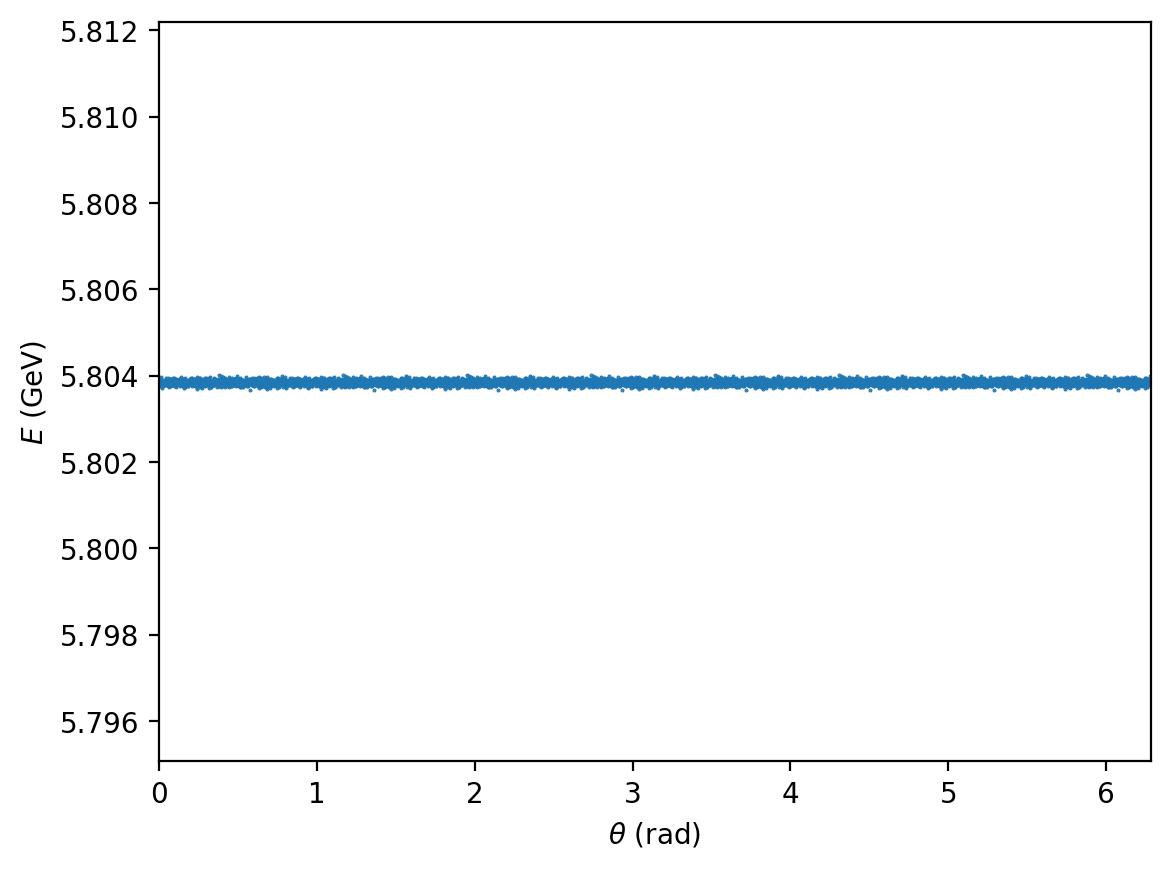

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(0,2*np.pi),ylim=(emin,emax))
ax.set_xlabel(r'$\theta$ (rad)')
ax.set_ylabel(r'$E$ (GeV)')
scat = ax.scatter([],[],s=0.2)


def init():
    scat.set_offsets(np.empty((0, 2)))
    return scat,

def animate(i):
    file = par_file_pattern % (2*i)
    #print(file)
    t, g = getPS(file,1)
    scat.set_offsets(np.hstack((t[:,np.newaxis],g[:,np.newaxis])))
    return scat,

# Example
animate(1)

In [10]:
anim = animation.FuncAnimation(fig,animate,init_func=init,blit = False,interval=20,frames = 500)
anim.save('Animation1.mp4')

## Animation 2

(<matplotlib.collections.PathCollection at 0x12051b2c0>,)

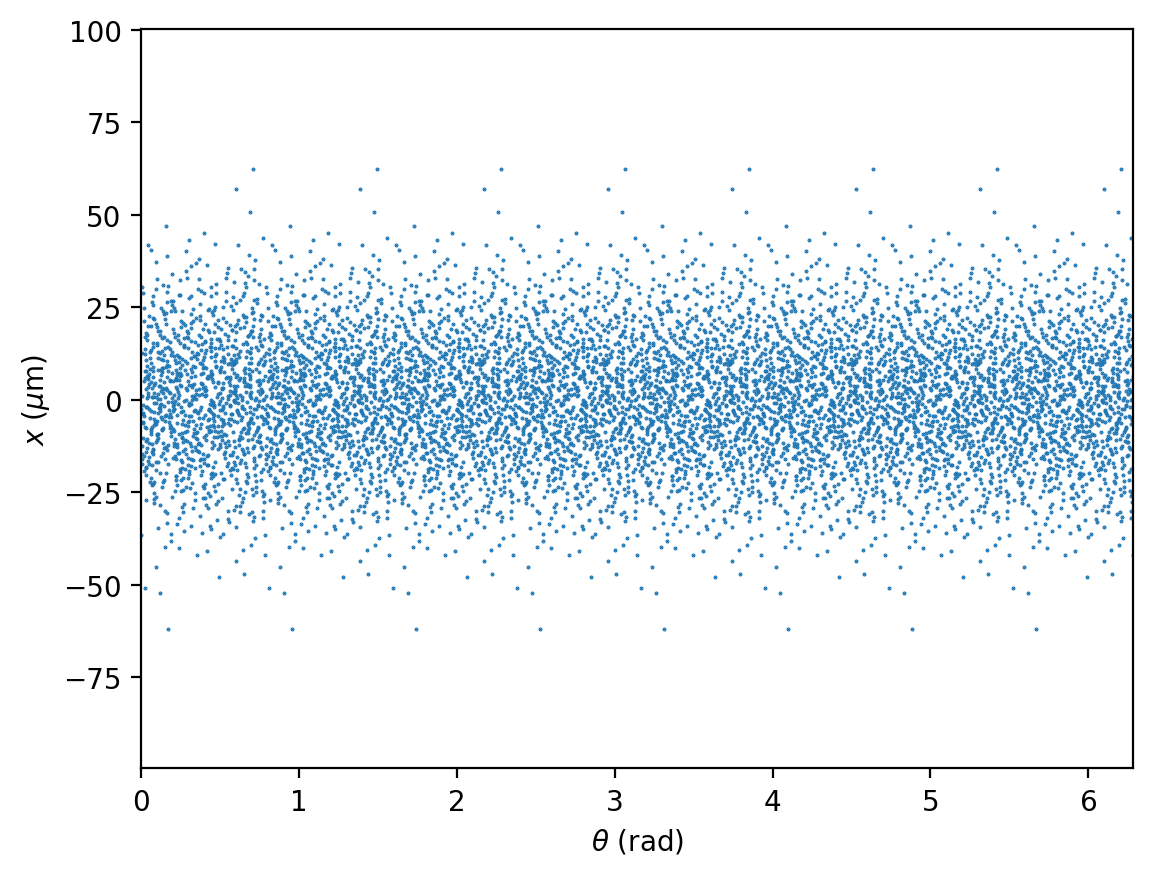

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0,2*np.pi),ylim=(xmin,xmax))
ax.set_xlabel(r'$\theta$ (rad)')
ax.set_ylabel(r'$x$ ($\mu$m)')
scat = ax.scatter([],[],s=0.2)

def init():
    scat.set_offsets(np.empty((0, 2)))
    return scat,

def animate(i):
    file = par_file_pattern % (2*i)
    #print(file)
    t, g = getTS(file,1)
    scat.set_offsets(np.hstack((t[:,np.newaxis],g[:,np.newaxis])))
    return scat,

animate(1)


In [12]:
anim = animation.FuncAnimation(fig,animate,init_func=init,blit = False,interval=20,frames = 500)
anim.save('Animation2.mp4')